<center style="font-size:30px;padding-bottom:10px;color:DarkBlue;">Práctica 2</center>
<p>&nbsp;</p>
<center style="font-size:25px;padding-bottom:10px;color:CornFlowerBlue;">Aplicación de Métodos de Monte Carlo a la Computación Bayesiana</center>
<p>&nbsp;</p>

<center style="font-size:18px;padding-bottom:10px;">María Barroso Honrubia</center>

<center style="font-size:18px;">Gloria del Valle Cano</center>

In [1]:
%%html
<head><link rel="stylesheet" href="style.css"></head>

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import beta, binom, norm, uniform, kstest
from scipy.integrate import quad


# Introducción

En un *enfoque bayesiano* de la estadística, un parámetro $\theta$ se
considera una variable aleatoria con una determinada distribución de
probabilidad. El teorema de Bayes relaciona la información inicial que
se tiene del parámetro $\theta$ antes de realizar un experimento y la
información que se dispone después de realizar el experimento.

-   La información inicial que se tiene sobre $\theta$ se representa
    mediante su *distribución a priori* $\pi(\theta)$

-   La información que se tiene de $\theta$ después de realizar uno
    (o varios) experimento/s, $x$, se codifica mediante su
    *distribución a posteriori* $\pi(\theta | x)$.

-   El teorema de Bayes nos permite obtener la densidad de probabilidad
    $\pi(\theta | x)$ en función del resultado del experimento y la
    densidad de probabilidad a priori $\pi(\theta)$

$$
    \pi(\theta | x) = \frac{ \pi(x | \theta) } { \int_{-\infty}^{\infty} \pi(x | \theta) \pi(\theta) \; d\theta} \; \pi(\theta)
$$

-   La cantidad $\pi(x | \theta)$ del numerador se denomina
    *verosimilitud* (*likelihood*). Es una **función** y representa la
    probabilidad de observar el resultado del experimento $x$
    (muestra) en función del valor del parámetro $\theta$

    $$ \pi(x | \theta) = \prod_i f(x_i | \theta) $$

    siendo $x_i$ con $i=1, \ldots, n$ los resultados del
    experimento (valores muestrales) y $f(x_i | \theta)$ sus
    probabilidades para un determinado valor de $\theta$.

-   El denominador $\int_{-\infty}^{\infty} \pi(x | \theta)
    \pi(\theta) \; d\theta$, una vez realizada la integración,
    **no** depende del parámetro $\theta$. Es una constante de
    normalización.

-   Para realizar previsiones se utilizan *distribuciones predictivas*
    (valor esperado de una determinada función)

$$
    E[ g(y|x) ] = \int g(y| \theta) \; \pi(\theta | x)\; d\theta
$$

Por ejemplo, es habitual usar como *predictor* del valor de la v.a
    $\theta$ su valor esperado: $$ \widehat{\theta} = \int
    \theta \; \pi(\theta | x) \; d\theta $$

-   Cuando las distribuciones a priori y a posteriori son del mismo tipo
    se dice que son "conjugadas a priori". A menudo esto implica grandes
    beneficios desde el punto de vista computacional.


-   La descripción formal de la inferencia bayesiana es sencilla, sin
    embargo su implementación **habitualmente no es fácil** y requiere
    Métodos de Monte Carlo.

<div class="qst">
    
## Ejercicio 1
Estimar la probabilidad de que un paciente ingresado en planta acabe en la UCI. Para realizar este problema mediante inferencia Bayesiana debemos tener en cuenta: 
* La probabilidad de que un paciente ingresado en planta acabe en la UCI será nuestro parámetro
$\theta$. Como hemos visto, en el enfoque bayesiano debemos
considerar que $\theta$ es una variable aleatoria. 
* Debemos conocer
la distribución de la v.a $\theta$ **antes** de realizar el
experimento, es decir su *densidad de probabilidad a priori*
$\pi(\theta)$. Supongamos, por ejemplo, que $\pi(\theta) =
B(\theta | \alpha = 5, \beta = 10)$. 
* Debemos incorporar el
resultado del experimento. Considerad el siguiente experimento: se
contabiliza cuantos de los pacientes que hay en planta ($n$) deben
ingresar en la UCI ($k$). Se observa que de los $n=20$ pacientes en
planta $k=1$ ingresan en la UCI. 
    * Debemos calcular la función de
verosimilitud $\pi(x | \theta)$ del resultado del experimento. La
función de verosimilitud será proporcional a la probabilidad de observar
el resultado del experimento en función del valor de $\theta$): $$
\pi(x | \theta) \propto \theta^k (1-\theta)^{n-k} $$ donde, en
este caso, habría que substituir $n=20$ y $k=1$. Notad como en la
ecuación anterior $\pi(x|\theta)$ **no** está normalizada. 
* Debemos elegir un *predictor* adecuado a nuestro problema. Como
predictor de $\theta$ *la probabilidad de que un paciente de la
planta acabe en la UCI* utilizaremos su valor esperado
$E[\theta]$. Nos preguntarnos entonces:

    1. ¿Cuál es el valor de $E[\theta]$ **antes** de realizar el experimento? 

    2. ¿Cuál es el valor de $E[\theta]$ **después** de observar el resultado del experimento?
    
**Ayuda**: La pregunta (1) es fácil. Al ser la distribución a priori $\pi(\theta)$ la distribución $Beta$, su valor esperado será
    $$ \mu_{\text{prior}} = E[\theta]_{\text{prior}} = \int_{-\infty}^{\infty} \theta \; B(\theta | \alpha, \beta) \; d\theta = \frac{\alpha}{\alpha + \beta} $$
* Para la pregunta (2) se debe calcular: $$ \mu_{\text{posterior}}= E[\theta]_{\text{posterior}} = \int_{-\infty}^{\infty} \theta \; \pi(\theta | x) \; d\theta $$
Para ello se necesita conocer la distribución a posteriori $\pi(\theta | x)$. Utilizando el teorema de Bayes, tras re-ordenar términos se obtiene: 

\begin{align*} 
E[\theta]_{\text{posterior}} &=
\int_{-\infty}^{\infty} \theta \; \pi(\theta | x) \; d \theta 
= \int_{-\infty}^{\infty} \theta \; \frac{ \pi(x |
\theta) \; \pi(\theta) } { \int_{-\infty}^{\infty} \pi(x |
\theta) \pi(\theta) \; d \theta} \; d \theta 
    \\&= \frac{
\int_{-\infty}^{\infty} \theta \; \pi(x | \theta) \;
\pi(\theta) \; d \theta } { \int_{-\infty}^{\infty} \pi(x |
\theta) \; \pi(\theta) \; d \theta} 
= \frac{\int_{-\infty}^{\infty} \theta \; \theta^k
(1-\theta)^{n-k} \; \; \pi(\theta) \; d \theta } {
\int_{-\infty}^{\infty} \pi(x | \theta) \; \pi(\theta) \;
d \theta} \\ &= \frac{ \int_{0}^{1} \; \theta^{k+1} (1-\theta)^{n-k}
\; \; B(\theta | \alpha=5, \beta=10) \; d \theta } {
\int_{0}^{1} \theta^{k} (1-\theta)^{n-k} \; B(\theta | \alpha=5,
\beta=10) \; d \theta}
\end{align*} 

donde se han sustituído los
valores de $\pi(\theta)$ y de la verosimilitud $\pi(x | \theta)$
. Si no supiésemos resolver analíticamente las integrales anteriores (en
este caso sí hay solución analítica aunque no es fácil) podemos
**estimar** el numerador y el denominador mediante integración de
Monte Carlo.
</div>


### Solución analítica: aplicación teoría de Bayes<a href="#Solución-analítica:-aplicación-teoría-de-Bayes" class="anchor-link">¶</a>

En el problema se sugiere utilizar una estrategia de Monte Carlo para
estimar el valor esperado de la distribución de probabilidad *a
posteriori* de $\theta$, siendo $\theta$ la probabilidad de que un
paciente en planta ingrese en la UCI.

En realidad, en este caso concreto, **no** es necesario utilizar Monte
Carlo. Cuando la distribución *a priori* $\pi(\theta)$ es una
distribución $Beta (\theta|\alpha, \beta)$ y la función de
verosimilitud $\pi(x| \theta)$ está dada por (5), la distribución
*a posteriori* $\pi(\theta| x)$ tiene una *expresión cerrada*. En
este caso $\pi(\theta| x)$ es también una distribución $Beta$ (se
dice que ambas son *conjugadas a priori*) de parámetros $\alpha'$ y
$\beta'$ donde $\alpha' = \alpha +k$ y $\beta'=\beta +
(n-k)$. Es decir, el parámetro $\alpha$ se incrementa en $k$ (el
número de éxitos del experimento) y $\beta$ en $n-k$ (el número de
fracasos).

En la gráfica siguiente se representan las distribuciones *a priori, a
posteriori* y *verosimilitud* para los valores propuestos por el
problema, $ \pi(\theta) = Beta(\theta|\alpha=5,\beta=10)$
$n=20$ y $k=1$.

    Expected probability a priori: 0.333 
    Expected probability a posterior: 0.171
    Maximum likelihood: 0.050
    Experimento: 
     Total pacientes:20  UCI:1

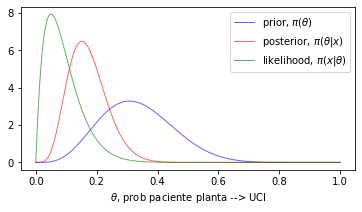

Como se observa la distribución a *posteriori* se sitúa entre la
distribución a priori (el conocimiento del que dispongo antes de
realizar el experimento) y la *verosimilitud* (el conocimiento que me
aporta *exclusivamente* el resultado del experimento).

En el problema estamos interesados en hallar el valor esperado de la v.a
\$\\theta\$ para las distribuciones *a priori* y *a posteriori*. O lo
que es lo mismo, debemos hallar el valor esperado de una v.a aleatoria
que se distribuye según una \$Beta (\\theta \|\\alpha, \\beta)\$ de
parámetros conocidos. Se puede demostrar que

$$
\mu = E[\theta] := \int_0^1 \theta \; B(\theta | \alpha,
\beta) \; d\theta = \frac{\alpha}{\alpha + \beta} 
$$

**¿Qué ocurre cuando aumenta el tamaño del experimento?**

En la gráfica siguiente se ha incrementado la muestra del experimento,
$n=100$, pero manteniendo el ratio $\frac k n = 0.05$ del experimento
original

    Expected probability a priori: 0.333 
    Expected probability a posterior: 0.087
    Maximum likelihood: 0.050
    Experimento: 
     Total pacientes:100  UCI:5

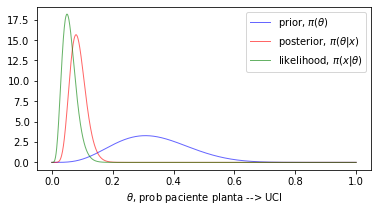

Algunas consecuencias interesantes a partir del conocimiento de la
expresión analítica de $\pi(\theta | x)$:

-   Al ser $\pi(\theta|x)$ también una distribución Beta, el valor
    esperado de $\theta$ a posteriori, i.e., después de observar el
    resultado del experimento, es

$$
\mu_{posterior} = \frac{\alpha'}{\alpha' + \beta'} =
\frac{\alpha + k}{\alpha + k + \beta + n - k} 
$$

Cuando el número de pacientes del experimento es muy grande, $n, k \to
\infty$, $\mu_{posterior}$ converge al valor de máxima
verosimilitud (MLE) $\frac k n$. Es decir, cuando $n \to \infty$, **el
*conocimiento a priori* es irrelevante frente a la información que
aporta el experimento.**

-   **La *incertidumbre* en torno al valor esperado
    $\mu_{posterior}$ decrece con $n \to \infty$**

$$
\sigma^2 = \lim_{n \to \infty} \frac{ \alpha' \beta'}{
(\alpha' + \beta')^2 (\alpha' + \beta' +1) } = \frac{k n -k^2}{n^3}
= 0 
$$

<div class="qst2">
$\textbf{Remark 1}$ El valor máximo de la verosimilitud MLE de una v.a
$\theta$ es el valor de $\theta$ para el cual la función de
verosimilitud es máxima 
    $$ 
    \theta_{MLE} = \text{argmax}_{\theta} \pi(x | \theta)
    $$ 
Habitualmente se calcula maximizando el logarítmo de $\pi(x|\theta)$:
    $$
    \frac{\partial}{\partial \theta} \log (\pi (x | \theta) ) = 0 
    $$
Para este problema, en el que $\pi(x| \theta)$ está dada por la
ecuación (5) 
    $$ 
    \frac{\partial }{\partial \theta}\left( k \log
(\theta) + (n-k) \log(1-\theta) \right) = 0
    $$
    se obtiene $\theta_{MLE} = \frac k n$
</div>

### Nuestra implementación

Aplicamos analíticamente el teorema de Bayes para computar las distribuciones a priori, a posteriori y verosimilitud. Es notable indicar que se ha deducido que la verosimilitud $\pi(x | \theta) \propto \theta^k (1-\theta)^{n-k}$ sigue una binomial con constante de normalización $n+1$, lo cual se ha obtenido resolviendo la integral:

\begin{align*}
\int_0^1 \pi(x | \theta) d \theta  &= \int_0^1 \dbinom{n}{k} \theta^k (1-\theta)^{1-k} d\theta 
\\ &= \dbinom{n}{k} \int_0^1  \theta^k (1-\theta)^{1-k} d\theta
\\ &= \dbinom{n}{k} \frac{\theta^{k+1}(1-\theta)^{n-k}}{k+1} \Big|_0^1 + \frac{n-k}{k+1} \int_0^1 \theta^{k+1}(1-\theta)^{n-k-1}d\theta
\\ &= \dbinom{n}{k} \Bigg[\frac{1^{k+1}(1-1)^{n-k}}{k+1} - \frac{0^{k+1}(1-0)^{n-k}}{k+1}\Bigg] + \frac{n-k}{k+1} \int_0^1 \theta^{k+1}(1-\theta)^{n-k-1}d\theta
\\ &= \dbinom{n}{k} + \frac{n-k}{k+1} \int_0^1 \theta^{k+1}(1-\theta)^{n-k-1}d\theta
\\ &= \dbinom{n}{k} \frac{(n-k)(n-k-1)}{(k+1)(k+2)} = \int_0^1 \theta^{k+2}(1-\theta)^{n-k-2} d \theta
\\ \text{(así hasta llegar a } \theta^n { )} &= \dbinom{n}{k} \frac{k!(n-k)!}{n!} \int_0^1 \theta^n d \theta
 \\ &= \int_0^1 \theta^n d \theta = \frac{1}{n+1}.
\end{align*}

De esta manera la likelihood integra a 1.

In [3]:
# Generamos 1000 valores de theta de 0 a 1
theta_range = np.linspace(0, 1, 1000)

def bayes(a, b, k, n):
    """
    Calcula las probabilidades prior, posterior y likelihood para el ejercicio 1
    Args:
        a (float): alpha
        b (float): beta
        k (int): número de éxitos
        n (int): número de pacientes
    """
    # El prior sigue una beta con alpha 5 y beta 10
    prior = beta(a, b).pdf(x=theta_range)
    e_prior = a/(a+b)
    
    print("Expected prob a priori: {0}".format(e_prior))
    
    # El posterior sigue una beta con alpha' y beta'
    posterior = beta(a+k, b+(n-k)).pdf(x=theta_range)
    e_posterior = (a+k)/(a+b+n)
    
    print("Expected prob a posterior: {0}".format(e_posterior))
    
    # La verosimilitud sigue una binomial con constante de normalización n+1
    likelihood = binom.pmf(k=k, n=n, p=theta_range)*(n+1)
    m_likelihood = np.argmax(likelihood)
    print("Maximum likelihood: {0}".format(theta_range[m_likelihood]))
    
    print("Experimento: \n Total pacientes: {0} \t UCI: {1}".format(n, k))
    
    return prior, posterior, likelihood
    
def plot_bayes(a, b, k, n):
    """
    Plot de las probabilidades prior, posterior y likelihood para el ejercicio 1
    Args:
        a (float): alpha
        b (float): beta
        k (int): número de éxitos
        n (int): número de pacientes
    """
    # Calculamos probabilidades
    prior, posterior, likelihood = bayes(a, b, k, n)
    
    # Generamos la figura
    plt.figure(figsize=(20,10))
    plt.title('Probabilidad de paciente de planta a UCI', fontsize=20)
    plt.plot(theta_range, prior, label=r'prior, $\pi(\theta))$', linewidth=3, color='blue')
    plt.plot(theta_range, posterior, label=r'posterior, $\pi(\theta|x))$', linewidth=3, color='red')
    plt.plot(theta_range, likelihood, label=r'likelihood, $\pi(x|\theta))$', linewidth=3, color='yellowgreen')
    plt.xlabel('θ', fontsize=16)
    plt.ylabel('Density', fontsize=16)
    plt.legend(loc="upper right")
    plt.show()

Mostramos el primer ejemplo para 20 pacientes:

Expected prob a priori: 0.3333333333333333
Expected prob a posterior: 0.17142857142857143
Maximum likelihood: 0.050050050050050046
Experimento: 
 Total pacientes: 20 	 UCI: 1


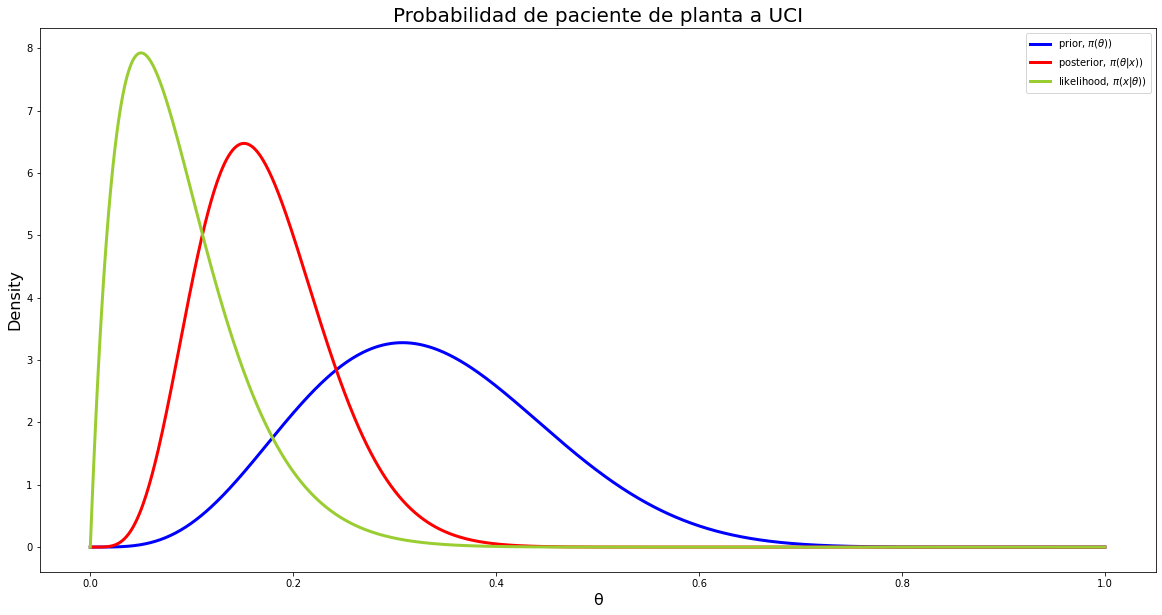

In [4]:
a, b, k, n = 5, 10, 1, 20
plot_bayes(a, b, k, n)

Mostramos el segundo ejemplo aumentando a 100 pacientes pero manteniendo el ratio del experimento original:

Expected prob a priori: 0.3333333333333333
Expected prob a posterior: 0.08695652173913043
Maximum likelihood: 0.050050050050050046
Experimento: 
 Total pacientes: 100 	 UCI: 5


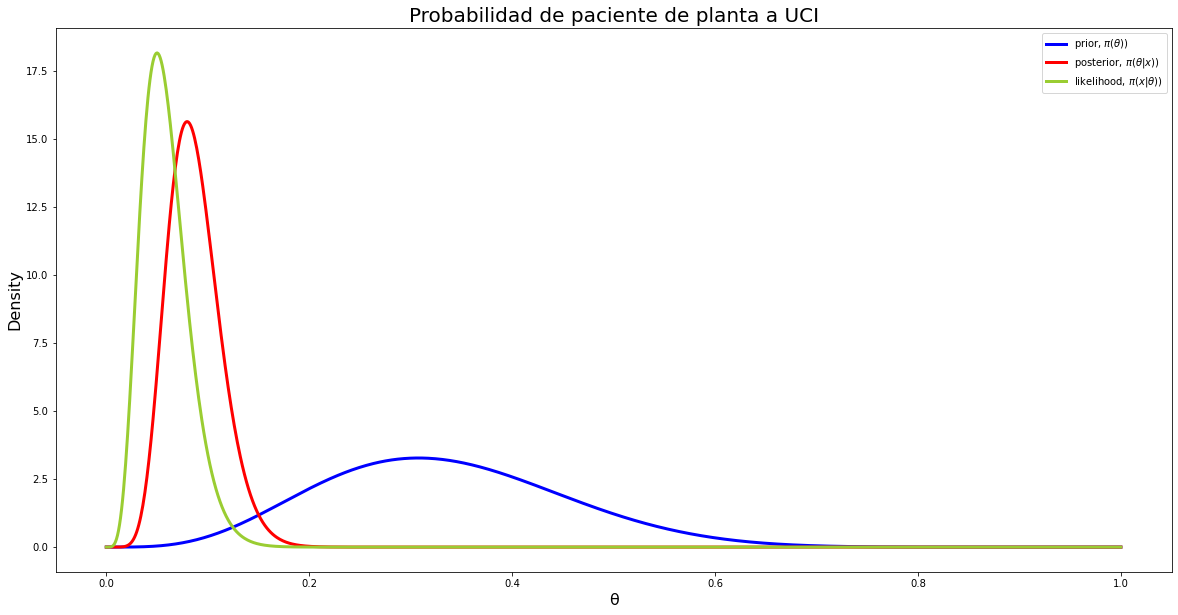

In [5]:
a, b, k, n = 5, 10, 5, 100
plot_bayes(a, b, k, n)

Comprobamos que $E[\theta]_{posterior} = \frac{ \int_{0}^{1} \; \theta^{k+1} (1-\theta)^{n-k}
\; \; B(\theta | \alpha=5, \beta=10) \; d \theta } {
\int_{0}^{1} \theta^{k} (1-\theta)^{n-k} \; B(\theta | \alpha=5,
\beta=10) \; d \theta} = \frac{(\alpha+k)}{(\alpha+\beta+n)}$:

In [6]:
a, b, k, n = 5, 10, 1, 20

def integrand(theta, q, k, n):
    """
    Resuelve las integrales de E[θ] (posterior)
    Args:
        theta (float): valor theta
        q (float): integral (1 numerador, 2 denominador)
        k (int): número de éxitos
        n (int): número de pacientes
    """
    if q == 1: # Numerador
        return ((theta**(k+1))*(1-theta)**(n-k))*beta(a, b).pdf(x=theta)
    else: # Denominador
        return (theta**k)*(1-theta)**(n-k)*beta(a, b).pdf(x=theta)
    
# Resolvemos la integral y vemos que es mismo valor
e_p1 = np.float32(quad(integrand, 0, 1, args=(1,k,n))[0] / quad(integrand, 0, 1, args=(2,k,n))[0])
e_p2 = np.float32((a+k)/(a+b+n))
e_p1 == e_p2

True

### Solución: Simulación por Monte Carlo

    Expected probability a posteriori MC: 0.088286 +- 0.020
    Confidence interval α = 0.22
    Experimento: 
     Total pacientes:100  UCI:5

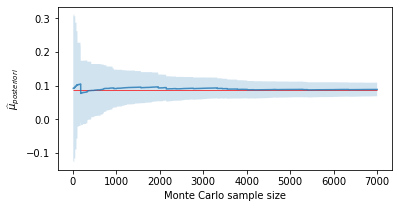

<div class="qst2">
$\textbf{Remark 2: Propagación del error}$ Supongamos que $Z$ es el
cociente de dos v.a $Z = \frac X Y$, si estimamos el valor esperado de
$\mu_Z$ por ejemplo mediante 

$$
\widehat{\\mu\_z} = \frac{\sum_{i=1}^n x_i}{\sum_{i=1}^n y_i} 
$$

donde $\{x_0,x_1, \ldots, x_n \}$ y $\{y_0, y_1, \ldots, y_n \}$ son
muestras de $X$ e $Y$ respectivamente ¿cómo estimar la varianza de
$\widehat{\mu_z}$? Podemos interpretar $x$ e $y$ como una $\textit{medida con un error asociado}$ ($x\pm \delta x$, $x\pm \delta x$) y estimar el error de la medida de $z$ en el $\textit{peor caso}$

\begin{align*} 
    (z + \delta z) (y + \delta y) 
    &= x + \delta x \\ zy + z \delta y + y \, \delta z + \delta z \; \delta y 
    &= x + \delta x \\
\end{align*}

Si en la ecuación anterior se dividen los
dos miembros por \$x\$ y asumiendo el peor caso (los errores se
suman) 
$$ 
\frac{\delta z}{z} = \frac{\delta x}{x} +
\frac{\delta y}{y} 
$$
</div>

### Nuestra implementación

El objetivo es estimar 
$$\mu_{posterior} = \frac{ \int_{0}^{1} \; \theta^{k+1} (1-\theta)^{n-k}
\; \; B(\theta | \alpha=5, \beta=10) \; d \theta } {
\int_{0}^{1} \theta^{k} (1-\theta)^{n-k} \; B(\theta | \alpha=5,
\beta=10) \; d \theta}, $$ 

y representar un intervalo de confianza de la estimación con una confianza de $1-\alpha$, de la forma:

$$[\widehat{\mu}_{posterior} \pm  \mbox{Error}_{\mu_{posterior}}].$$


En primer lugar, estimaremos la integral del numerador $I_1$ y del numerador $I_2$ utilizando Monte Carlo. Para ello, se generarán muestras $\{\theta_0,
\theta_1, \theta_2, \cdots, \theta_n\}$ de la distribución *a
priori* $\pi(\theta)$ de modo que $\widehat{I_1}=\frac{1}{n}\sum{\theta_i^{k+1} (1-\theta_i)^{n-k}}$ y $\widehat{I_2}=\frac{1}{n}\sum{\theta^{k} (1-\theta)^{n-k}}$. De esta manera, 
$$\widehat{\mu}_{posterior} = \frac{\widehat{I_1}}{\widehat{I_2}} = \frac{\sum{\theta_i^{k+1} (1-\theta_i)^{n-k}}}{\sum{\theta^{k} (1-\theta)^{n-k}}} = \frac{\sum{H_1({\theta_i})}}{\sum{H_2({\theta_i})}}.$$

Para estimar el error típico, siguiendo la fórmula descrita arriba, tenemos que
$$
\mbox{Error}_{\mu_{posterior}} \, = \, \frac{\widehat{\mu}_{posterior} z_{\alpha / 2}}{
{\sqrt{n}}} \left(\frac{s_{I_1}}{\widehat{I_1}} + \frac{s_{I_2}}{\widehat{I_2}}\right),
$$
donde $s_{I_1}$ y $s_{I_2}$ son los errores típicos de $I_1$ y $I_2$, dados por las fórmulas

$$s_{I_1} = \sqrt{\frac{1}{n-1}\sum{(H_1(\theta_i)- \widehat{I_1}})^2} \mbox{ y } s_{I_2} = \sqrt{\frac{1}{n-1}\sum{(H_2(\theta_i)- \widehat{I_2})^2}},$$

y $z_{\alpha / 2}$ el precentil correspondiente al valor de $\alpha$ elegido.


A la hora de reprentar los intervalos de confianza por Monte Carlo se han seguido dos estrategias
* **Una única simulación independiente y varios tamaños:** Se estiman las esperanzas y el error para cada tamaño de la muestra.
* **Muchas simulaciones independientes (nsimul) y varios tamaños:** Se estiman las esperanzas de cada simulación para cada tamaño de la muestra.

In [7]:
def get_ci_e_posteriori(i1, i2, n, alpha): 
    """
    Calcula las estimaciones de la media y el error de E[θ] (posterior)
    Args:
        i1 (np ndarray): numerador
        i2 (np ndarray): denominador
        n (int): número de muestras
        alpha (float): nivel de significancia estadística
    """
    
    size = np.arange(start=1, stop = n+1, step=1)
    
    # media muestral
    media1 = np.cumsum(i1)/size
    media2 = np.cumsum(i2)/size
    media = media1/media2
    
    # Varianza y desviación típica muestral
    s2_1, s2_2 = (i1-media1)**2, (i2-media2)**2
    s2_1[0], s2_2[0]  = 0., 0.
    s2_1[1:], s2_2[1:] = np.cumsum(s2_1)[1:]/size[0:-1], np.cumsum(s2_2)[1:]/size[0:-1]
    std1, std2 = np.sqrt(s2_1), np.sqrt(s2_2)
    
    # Error
    error1 = std1/media1
    error2 = std2/media2
    error = media*(error1+error2)
      
    # Intervalos de confianza
    z_alpha = norm.ppf(1 - (alpha/2))
    ci_inf = media - z_alpha/np.sqrt(size)*error
    ci_sup = media + z_alpha/np.sqrt(size)*error
    
    return {'size' : size, 'media' : media, 'ci_inf': ci_inf, 'ci_sup' : ci_sup}

def estimate_integrand(q, a, b, k, n, x, p):
    """
    Estima numerador y denominador de E[θ] (posterior)
    Args:
        q (float): integral (1 numerador, 2 denominador)
        x (np ndarray): muestra
        i1 (np ndarray): numerador
        i2 (np ndarray): denominador
        n (int): número de muestras
        alpha (float): nivel de significancia estadística
    """
    if q == 1: # Numerador
        return (x**(k+1))*((1-x)**(n-k))*p
    else: # Denominador
        return (x**k)*((1-x)**(n-k))*p

def get_ci_unica_simulacion(a, b, k, n, N, alpha, generator_beta=True):
    """
    Calcula el intervalo de confianza para E[θ] (posterior)
    Args:
        a (int): param alpha de beta
        b (int): param beta de beta
        k (int): número de éxitos
        n (int): número de muestras
        N (int): tamaño máximo de la muestra
        alpha (float): nivel de significancia estadística
        generator_beta (boolean): si la muestra viene de la Beta
    """
    # Generamos muestras dependiendo de si es de Beta/Uniforme
    if generator_beta:
        sample = beta(a, b).rvs(N)
        p = 1
    else:
        sample = uniform.rvs(loc=0, scale=1, size=N)
        p = beta(a, b).pdf(x=sample)
    
    # Estimación de los integrandos
    i1 = estimate_integrand(1, a, b, k, n, sample, p)
    i2 = estimate_integrand(2, a, b, k, n, sample, p)
    
    # Cálculo del error
    media = np.sum(i1)/np.sum(i2)
    z_alpha = norm.ppf(1-(alpha/2))
    error = media*z_alpha/np.sqrt(N)*(np.std(i1)/np.mean(i1)+np.std(i2)/np.mean(i2))

    print("Theorical Expected probability a posteriori: {0}".format((a+k)/(a+b+n)))
    print("Expected probability a posteriori: {0} +- {1}".format(media, error))
    print("Confidence interval α: {0}".format(alpha))
    print("Experimento: \n Total pacientes: {0} \t UCI: {1}".format(n, k))
    print(" N = {}".format(N))

    return get_ci_e_posteriori(i1=i1, i2=i2, n=N, alpha=alpha)

def get_ci_varias_simulaciones(a, b, k, n, N, nsimul, alpha, generator_beta=True):
    """
    Realiza nsimul simulaciones para calcular el intervalo de confianza para E[θ] (posterior)
    Args:
        a (int): param alpha de beta
        b (int): param beta de beta
        k (int): número de éxitos
        n (int): número de muestras
        N (int): tamaño máximo de la muestra
        nsimul (int): número de simulaciones
        alpha (float): nivel de significancia estadística
        generator_beta (boolean): si la muestra viene de la Beta
    """
    
    r_all = np.zeros((N, nsimul))
    # Generamos muestras dependiendo de si es de Beta/Uniforme
    if generator_beta:
        sample = beta(a, b).rvs(N*nsimul).reshape((nsimul, N))
        p = 1
    else:
        sample = uniform.rvs(loc = 0, scale = 1, size = N*nsimul).reshape((nsimul, N))
        
    # Calculamos el error para nsimul simulaciones
    for simul in np.arange(nsimul):
        x = sample[simul,:]
        if not generator_beta:
            p = beta(a, b).pdf(x=x)
        i1 = estimate_integrand(1, a, b, k, n, x, p)
        i2 = estimate_integrand(2, a, b, k, n, x, p)
        r = get_ci_e_posteriori(i1=i1, i2=i2, alpha=alpha, n=N)    
        r_all[:, simul] = r['media']
    
    return r_all

def plot_e_posteriori(r1, r_all, N, e_theo):
    """
    Plot de las simulaciones realizadas por Monte Carlo para calcular el intervalo de confianza para E[θ] (posterior)
    Args:
        r1 (dict): estimación del intervalo de confianza (1 simulación)
        r_all (np ndarray): estimación del intervalo de confianza (nsimul simulaciones)
        N (int): tamaño máximo de la muestra
        e_theo (float): valor esperado de theta a posteriori teórico
    """
    fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=True)
    plt.ylim([-0.1, 0.3])

    ax[0].plot (r1['size'], r1['media'],  c='blue' ,linestyle='dotted', lw=0.8)
    ax[0].plot (r1['size'], r1['ci_inf'], c='blue', alpha=0.4, lw=0.2)
    ax[0].plot (r1['size'], r1['ci_sup'], c='blue', alpha=0.4, lw=0.2)
    ax[0].fill_between(r1['size'],r1['ci_inf'],r1['ci_sup'], alpha=0.2)

    ax[0].hlines(e_theo, 0, r1['size'][-1], colors='red', lw=0.8, linestyle ="--")
    ax[0].set_xlabel("Sample size")
    ax[0].set_ylabel (r'$\hat{\mu}_{posteriori}$')
    ax[0].grid(lw=0.2)

    xx = np.arange(1, N+1)
    ax[1].hlines(e_theo, 0, xx[-1], colors='red', linewidth=1, linestyle ="--")
    ax[1].plot(xx, r_all, linewidth=0.2, alpha=0.4)
    ax[1].set_ylabel (r'$\hat{\mu}_{posteriori}$')
    ax[1].set_xlabel("Sample size")
    ax[1].grid(lw=0.2)

    plt.show()

Theorical Expected probability a posteriori: 0.08695652173913043
Expected probability a posteriori: 0.0879729883567199 +- 0.020569125883862952
Confidence interval α: 0.22
Experimento: 
 Total pacientes: 100 	 UCI: 5
 N = 7000


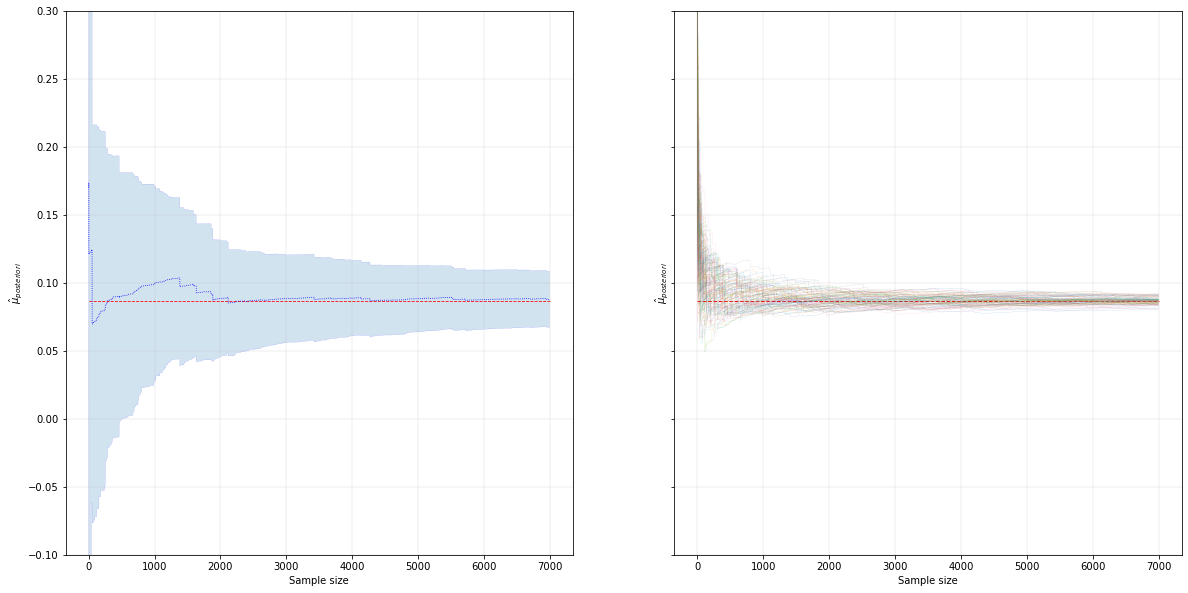

In [8]:
np.random.seed(123)

# Inicializamos variables
a, b, k, n = 5, 10, 5, 100
N = 7000 # Tamaño máximo de la muestra
alpha = 0.22 # Nivel de significancia
nsimul = 100 # Número de simulaciones independientes

# Una única simulación independiente. Varios tamaños
r1 = get_ci_unica_simulacion(a, b, k, n, N, alpha)

# Muchas simulaciones  (nsimul)
r_all = get_ci_varias_simulaciones(a, b, k, n, N, nsimul, alpha)

# Representamos ambas estimaciones
e_theo = (a+k)/(a+b+n)
plot_e_posteriori(r1, r_all, N, e_theo)

#### Aumentando el tamaño de la muestra (N)

Theorical Expected probability a posteriori: 0.08695652173913043
Expected probability a posteriori: 0.08742710324587569 +- 0.0063621153022743945
Confidence interval α: 0.22
Experimento: 
 Total pacientes: 100 	 UCI: 5
 N = 70000


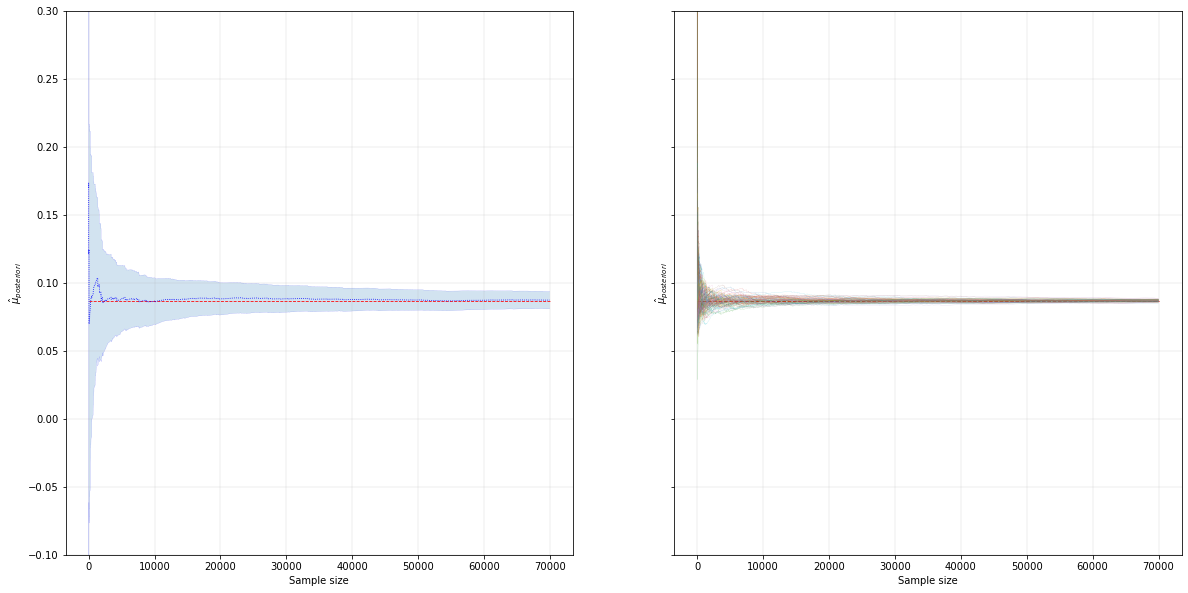

In [9]:
np.random.seed(123)

# Inicializamos variables
a, b, k, n = 5, 10, 5, 100
N = 70000 # Tamaño máximo de la muestra
alpha = 0.22 # Nivel de significancia
nsimul = 100 # Número de simulaciones independientes

# Una única simulación independiente. Varios tamaños
r1 = get_ci_unica_simulacion(a, b, k, n, N, alpha)

# Muchas simulaciones  (nsimul)
r_all = get_ci_varias_simulaciones(a, b, k, n, N, nsimul, alpha)

# Representamos ambas estimaciones
e_theo = (a+k)/(a+b+n)
plot_e_posteriori(r1, r_all, N, e_theo)

**Cuestiones**:


-   **¿Por que se debe utilizar la misma muestra de \$\\theta\$ en el numerador y denominador para estimar \$\\mu\_{posterior}\$?**
      

Porque el denominador $\int_{-\infty}^{\infty} \pi(x | \theta)
    \pi(\theta) \; d\theta$, es una constante de normalización de la verosimilitud y por tanto, depende de la muestra que se utilice para la verosimilitud.


-   **¿Por que a la hora de hacer la simulación de M.C hemos podido utilizar una función sin normalizar proporcional a \$\\pi(x \|\\theta)\$ eq. (5) y no \$\\pi(x \| \\theta)\$?**


Porque se anula con el denominador:

$$
\begin{align*} 
E[\theta]_{\text{posterior}} &=
\int_{-\infty}^{\infty} \theta \; \pi(\theta | x) \; d \theta 
= \int_{-\infty}^{\infty} \theta \; \frac{ \pi(x |
\theta) \; \pi(\theta) } { \int_{-\infty}^{\infty} \pi(x |
\theta) \pi(\theta) \; d \theta} \; d \theta 
    \\&= \frac{
\int_{-\infty}^{\infty} \theta \; \pi(x | \theta) \;
\pi(\theta) \; d \theta } { \int_{-\infty}^{\infty} \pi(x |
\theta) \; \pi(\theta) \; d \theta} 
= \frac{\int_{-\infty}^{\infty} \theta \; \theta^k
(1-\theta)^{n-k} (n+1) \; \; \pi(\theta) \; d \theta } {
\int_{-\infty}^{\infty} \pi(x | \theta) \; \pi(\theta) \;
d \theta} \\ &= \frac{n+1}{n+1} \frac{ \int_{0}^{1} \; \theta^{k+1} (1-\theta)^{n-k}
\; \; B(\theta | \alpha=5, \beta=10) \; d \theta } {
\int_{0}^{1} \theta^{k} (1-\theta)^{n-k} \; B(\theta | \alpha=5,
\beta=10) \; d \theta} \\&= \frac{ \int_{0}^{1} \; \theta^{k+1} (1-\theta)^{n-k}
\; \; B(\theta | \alpha=5, \beta=10) \; d \theta } {
\int_{0}^{1} \theta^{k} (1-\theta)^{n-k} \; B(\theta | \alpha=5,
\beta=10) \; d \theta}
\end{align*}$$



-   **¿Se comporta correctamente tu estimación cuando aumenta el tamaño del experimento?**


Para tamaños de muestra menores que 2000, el valor estimado $\widehat{\mu}_{posterior}$ se aleja más del teórico y presenta mayor varianza. Sin embargo, a partir de este tamaño muestral, apenas difiere respecto al valor teórico $\mu_{posterior}$ y disminuye considerablemente la varianza. 

Para un tamaño muestral igual a 7000 se obtenía un error estimado aproximadamente de 0.020, mientras que para 70000 disminuye considerablemente a 0.0063.
            



#### Aumentando el nivel de confianza

Theorical Expected probability a posteriori: 0.08695652173913043
Expected probability a posteriori: 0.08742710324587569 +- 0.010166515267156511
Confidence interval α: 0.05
Experimento: 
 Total pacientes: 100 	 UCI: 5
 N = 70000


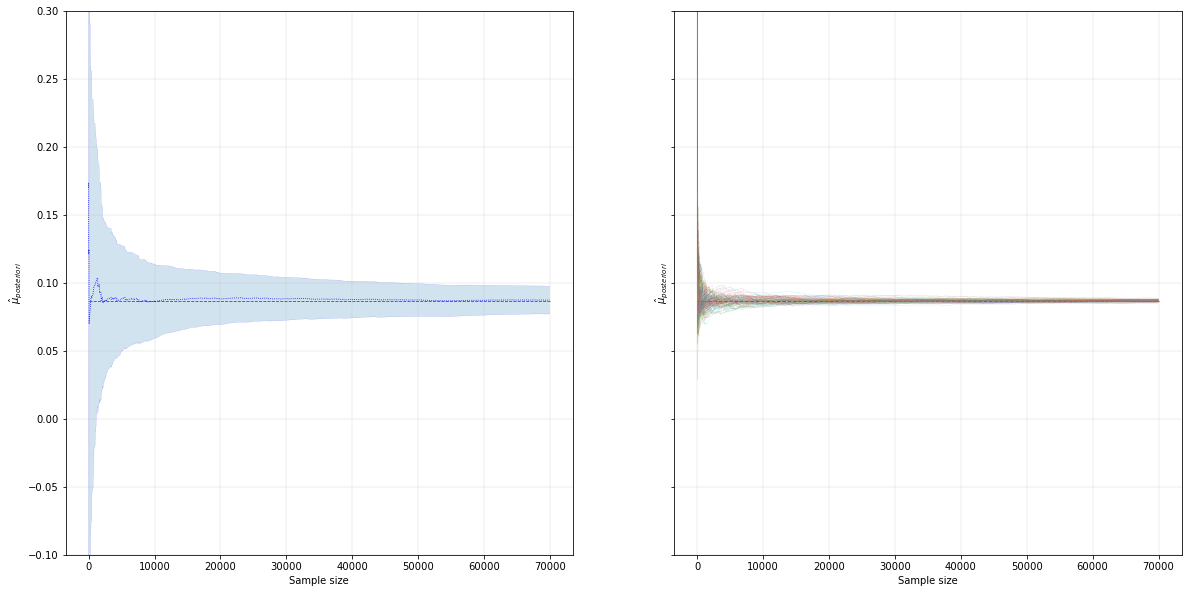

In [10]:
np.random.seed(123)

# Inicializamos variables
a, b, k, n = 5, 10, 5, 100
N = 70000 # Tamaño máximo de la muestra
alpha = 0.05 # Nivel de significancia
nsimul = 100 # Número de simulaciones independientes

# Una única simulación independiente. Varios tamaños
r1 = get_ci_unica_simulacion(a, b, k, n, N, alpha)

# Muchas simulaciones  (nsimul)
r_all = get_ci_varias_simulaciones(a, b, k, n, N, nsimul, alpha)

# Representamos ambas estimaciones
e_theo = (a+k)/(a+b+n)
plot_e_posteriori(r1, r_all, N, e_theo)

        
-   **¿Cómo de fiable es la estimación del error que hemos hecho? Discute que valor de \$z\_{\\alpha/2}\$ es apropiado.**

    La estimación tiene una fiabilidad o confianza del $78\%$, ya que estaremos equivocándonos en la estimación el $0.22\%$ de las veces. Para aumentar la confianza en los resultados, tendríamos que utilizar un nivel de significación $\alpha$ igual al $5\%$, lo que supone trabajar con un \$z\_{\\alpha/2} = 1.96\$. Es decir, utilizando muestras de 70000 y $\alpha$ igual al $5\%$, el valor esperado de $\mu_{posterior}$ caerá dentro de $$[0.08742710324587569 \pm 0.010166515267156511]$$ el $95\%$ de las veces.


#### Utilizando muestras Uniformes

Theorical Expected probability a posteriori: 0.08695652173913043
Expected probability a posteriori: 0.08797079412108383 +- 0.008113847057979323
Confidence interval α: 0.22
Experimento: 
 Total pacientes: 100 	 UCI: 5
 N = 7000


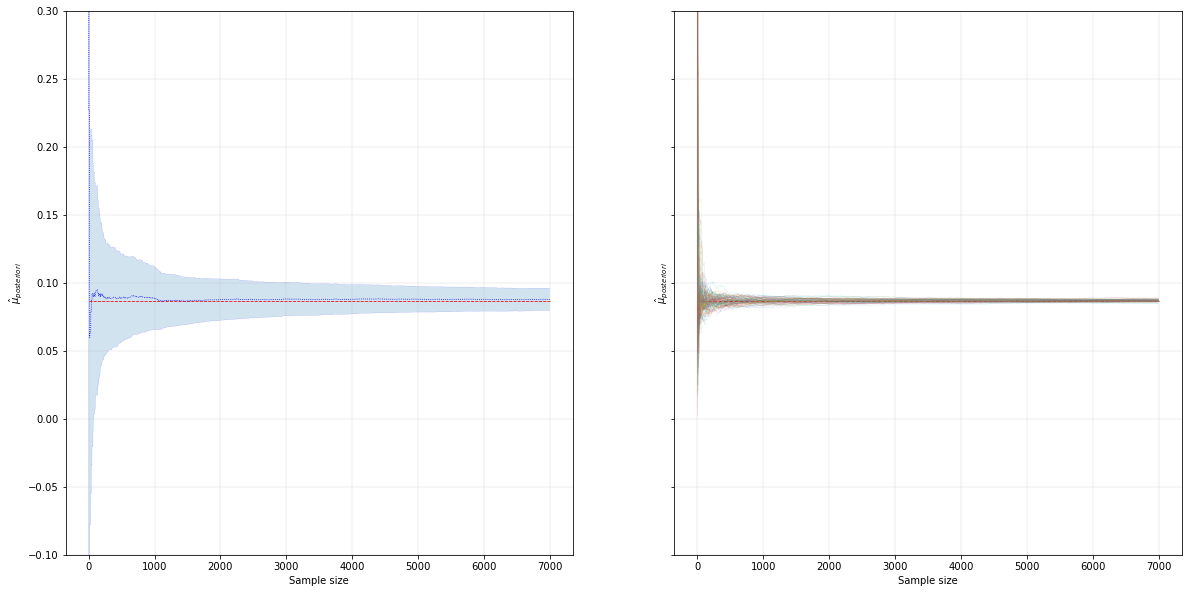

Theorical Expected probability a posteriori: 0.08695652173913043
Expected probability a posteriori: 0.08691963907328915 +- 0.0025394662926688195
Confidence interval α: 0.22
Experimento: 
 Total pacientes: 100 	 UCI: 5
 N = 70000


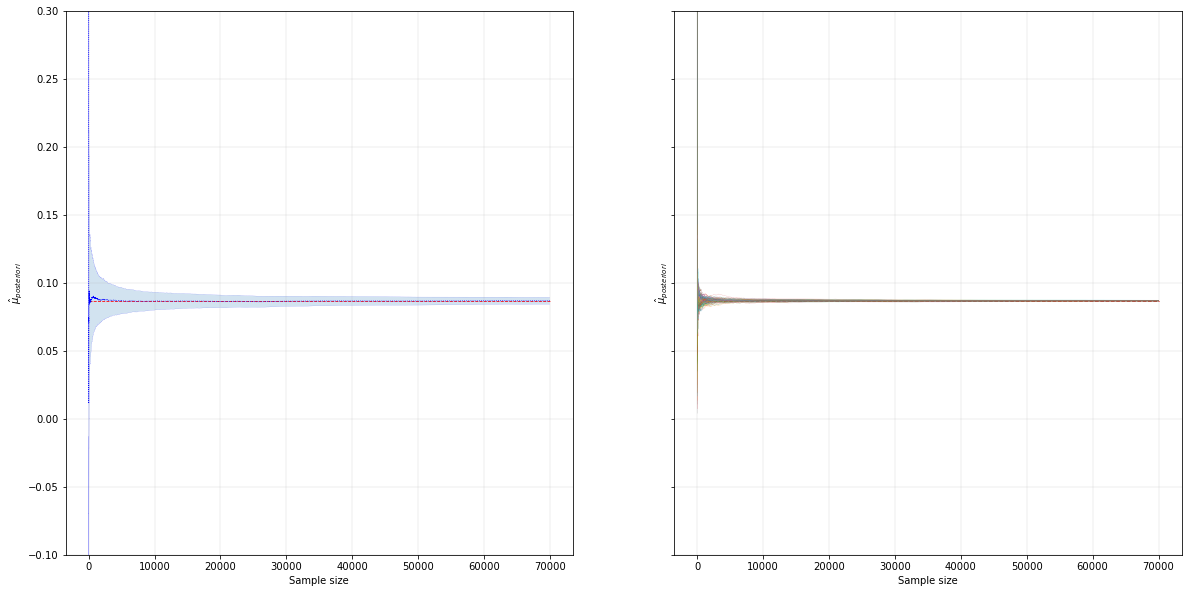

Theorical Expected probability a posteriori: 0.08695652173913043
Expected probability a posteriori: 0.08667786718316187 +- 0.004034645815949409
Confidence interval α: 0.05
Experimento: 
 Total pacientes: 100 	 UCI: 5
 N = 70000


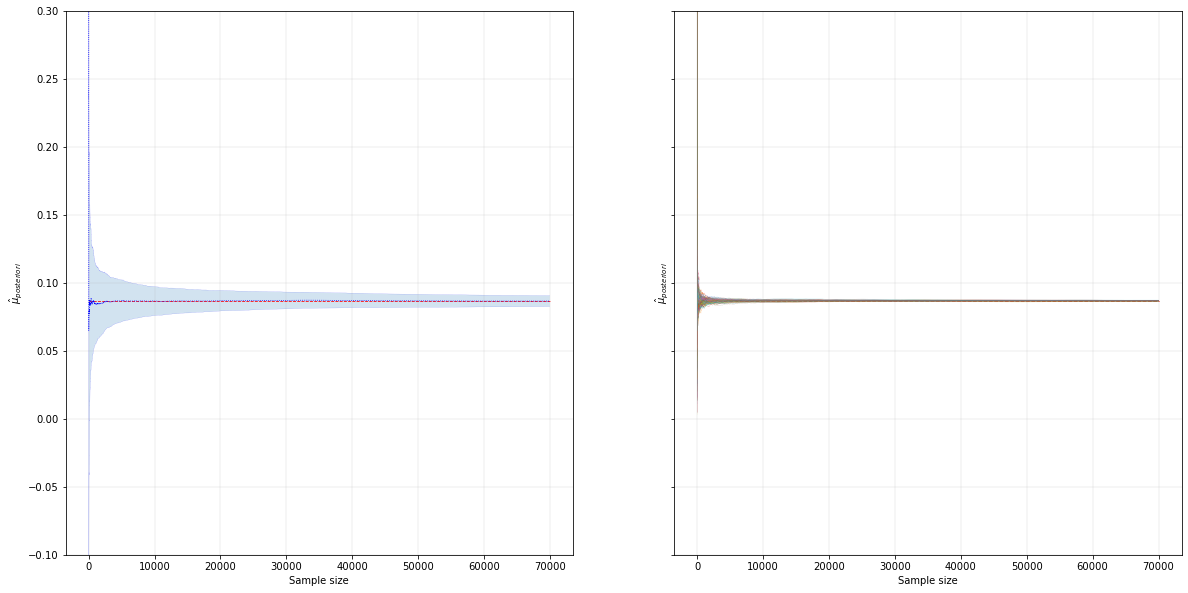

In [11]:
np.random.seed(123)

# Inicializamos variables
a, b, k, n = 5, 10, 5, 100
alpha = 0.22 # Nivel de significancia
nsimul = 100 # Número de simulaciones independientes

########################## N = 7000 ##########################
N = 7000 # Tamaño máximo de la muestra

# Una única simulación independiente. Varios tamaños
r1 = get_ci_unica_simulacion(a, b, k, n, N, alpha, False)

# Muchas simulaciones  (nsimul)
r_all = get_ci_varias_simulaciones(a, b, k, n, N, nsimul, alpha, False)

# Representamos ambas estimaciones
e_theo = (a+k)/(a+b+n)
plot_e_posteriori(r1, r_all, N, e_theo)


########################## N = 7000 ##########################
N = 70000 # Tamaño máximo de la muestra

# Una única simulación independiente. Varios tamaños
r1 = get_ci_unica_simulacion(a, b, k, n, N, alpha, False)

# Muchas simulaciones  (nsimul)
r_all = get_ci_varias_simulaciones(a, b, k, n, N, nsimul, alpha, False)

# Representamos ambas estimaciones
e_theo = (a+k)/(a+b+n)
plot_e_posteriori(r1, r_all, N, e_theo)


########################## N = 7000, alpha = 0.05 ##########################
alpha = 0.05 # Nivel de significancia

# Una única simulación independiente. Varios tamaños
r1 = get_ci_unica_simulacion(a, b, k, n, N, alpha, False)

# Muchas simulaciones  (nsimul)
r_all = get_ci_varias_simulaciones(a, b, k, n, N, nsimul, alpha, False)

# Representamos ambas estimaciones
e_theo = (a+k)/(a+b+n)
plot_e_posteriori(r1, r_all, N, e_theo)



-   **Supón que no se dispone de un generador de números aleatorios
    para la distribución a priori (porqué o bien no dispones de un
    algoritmo o este es muy ineficaz) ¿Podrías estimar
    \$\\mu\_{posterior}\$? Estima el valor de \$\\mu\_{posterior}\$
    sin utilizar el generador de una muestra de Beta (por
    ejemplo utiliza una distribución \$\\mathcal{U}(0,1)\$). Discute
    el intervalo de confianza de la estimación.**
    
    
    
En el caso de que se utilice una muestra $\{u_0,
u_1, u_2, \cdots, u_n\}$ de la distribución \$\\mathcal{U}(0,1)\$), la estimación ${\mu}_{posterior}$ es

$$\widehat{\mu}_{posterior} = \frac{\widehat{I_1}}{\widehat{I_2}} = \frac{\sum{u_i^{k+1} (1-u_i)^{n-k}B(u_i | \alpha=5, \beta=10)}}{\sum{u_i^{k} (1-u_i)^{n-k}B(u_i | \alpha=5, \beta=10)}} = \frac{\sum{H_1({u_i})}}{\sum{H_2({u_i})}}$$

y el intervalo de confianza se calcula de la misma manera para las nuevas estimaciones de $\widehat{I}$ y $H(U)$.

Si observamos las gráficas de los intervalos de confianza vemos que presentan una varianza mucho menor, sobre todo cuando $N$ aumenta.



    
  
    

<div class="qst">

## Ejercicio 2
Estimar empíricamente la función de densidad de
probabilidad *a posteriori* $\pi(\theta | x)$ del ejercicio
anterior y validarla con el resultado teórico. Discutir los resultados.

</div>


### Introducción<a href="#Introducción" class="anchor-link">¶</a>

Si recuerdas en el ejercicio anterior estimamos, utilizando Monte Carlo,
el valor esperado de $\theta$ *a posteriori*, es decir, una vez
realizado el experimento. Recuerda que lo estimamos **sin** necesidad de
conocer la distribución a posteriori $\pi(\theta | x)$. Para ello
utilizamos el Teorema de Bayes. Además validamos nuestra estimación con
la solución analítica.

Ahora nos planteamos ¿es posible generar una muestra de la variable
aleatoria de la distribución *a posteriori* $\pi(\theta | x)$?.
Para ello se propone utilizar un método de aceptación y rechazo y
validarlo con la solución analítica.

### Ayuda<a href="#Ayuda" class="anchor-link">¶</a>

El algoritmo consistirá en generar una muestra $\{\theta_0,
\theta_1, \theta_2, \cdots, \theta_n\}$ de la distribución *a
priori* $\pi(\theta)$ y aceptar como valores de la distribución *a
psoteriori* $\pi(\theta | x)$ aquellos $\theta_i$ que
satisfagan un determinado criterio de aceptación/rechazo.

-   Un algoritmo y criterio *tentativo* podría ser:

>    1.  Generar una muestra $\{\theta_0, \theta_1, \theta_2,
\>    \cdots, \theta_n\}$ de la distribución a priori
>    $\pi(\theta)$
>    
>    2.  Aceptar $\theta_i$ con probabilidad $$ p = \frac{
\>    \pi(\theta_i | x) }{c \cdot \pi(\theta_i) } $$ donde
>    $c$ es, como de costumbre, una constante tal que para todo
>    $\theta$, $p \in [0, 1]$. Para aplicar el criterio
>    anterior podríamos, como de costumbre, generar una muestra
>    $\{u_0, u_1, u_2, \cdots, u_n\}$ de la distribución
>    uniforme $U(0,1)$ y aceptar $\theta_i$ si $u_i < \frac{
\>    \pi(\theta_i | x) }{c \cdot \pi(\theta_i) }$

Es decir, tratamos de aplicar el mismo algoritmo de aceptación/rechazo
visto en clase. El problema con este *criterio tentativo* es evidente.
Para aplicarlo necesitamos: (i) evaluar $\pi(\theta | x)$ en
$\theta_i$ y (ii) calcular previamente el valor de la constante
$c$. Pero ¿Cómo podemos hacerlo si precisamente desconocemos la
distribución $\pi(\theta | x)$?

-   ¿Qúe podemos hacer? Recurrir al Teorema de Bayes $$ \frac{
    \pi(\theta | x) }{ \pi(\theta) } = \frac{ \pi(x | \theta) }
    { \int_{-\infty}^{\infty} \pi(x | \theta) \pi(\theta) \;
    d\theta} $$

    pero, en vez de utilizar el lado izquierdo de la ecuación anterior
    para evaluar la probabilidad $p$ de aceptar $\theta_i$ como en
    la ecuación (21), utilizar el miembro derecho de (22). Sin embargo,
    aun nos falta estimar el valor de $c$. Necesitamos *normalizar* el
    cociente $\frac{ \pi(x | \theta) } {
    \int_{-\infty}^{\infty} \pi(x | \theta) \pi(\theta) \;
    d \theta} $ por una constante $c$ para que su valor este
    comprendido en el intervalo $[0, 1]$. Pero esto no es
    complicado. Sabemos que *necesariamente* $\frac{ \pi(x |
    \theta) } { \int_{-\infty}^{\infty} \pi(x | \theta)
    \pi(\theta) \; d\theta} $ está acotado: el numerador es una
    función densidad de probabilidad y el denominador es una constante,
    no depende de $\theta$. Es decir que $$ \frac{ \pi(x |
    \theta) } { \int_{-\infty}^{\infty} \pi(x | \theta)
    \pi(\theta) \; d \theta} \leq \frac{ \text{argmax}_{\theta}
    \left( \pi(x | \theta) \right) } { \int_{-\infty}^{\infty}
    \pi(x | \theta) \pi(\theta) \; d \theta} = c $$

    donde $\text{argmax}_{\theta} \left( \pi(x | \theta)
    \right)$ representa al valor máximo de la verosimilitud $\pi(x
    | \theta)$. Es decir, ni siquiera necesitamos calcular la
    integral $\int_{-\infty}^{\infty} \pi(x | \theta)
    \pi(\theta) \; d \theta$ ya que cuando dividamos la
    ecuación (22) por $c$ se nos va a cancelar!!!

Además sabemos que la función de verosimilitud alcanza su máximo cuando
$\theta $ es el *valor máximo de verosimilitud* $\theta_{MLE} =
k/N$, siendo $N$ el número total de pacientes y $k$ el número de
pacientes que ingresan en la UCI. Recopilando todo:

-   Algoritmo final para obtener una muestra de $\pi(\theta |
    x)$ \>

    > 1.  Calcular $a = \text{argmax}_{\theta} \left( \pi(x |
    \>     \theta) \right) $
    > 2.  Generar una muestra $\{\theta_0, \theta_1, \theta_2,
    \>     \cdots, \theta_n\}$ de la distribución a priori
    \>     $\pi(\theta)$
    \> 3.  Aceptar $\theta_i$ con probabilidad $$ p = \frac{
    \>     \pi(x | \theta) } {c \cdot \int_{-\infty}^{\infty}
    \>     \pi(x | \theta) \pi(\theta) \; d \theta} = \frac{
    \>     \pi(x | \theta) }{a} $$

### Resultados Simulación Monte Carlo<a href="#Resultados-Simulación-Monte-Carlo" class="anchor-link">¶</a>

En la siguiente gráfica se muestra un histograma con la estimación
empírica de la función de densidad de probabilidad a posteriori
$\pi(\theta | x)$ junto con el resultado teórico (en azul
distribución Beta de parámetros $a$ y $b$ conocidos).

La eficiencia del algoritmo de aceptación/rechazo ha sido del
$6.52\%$

    Efficiency= 0.0652
    KstestResult(statistic=0.009582283853363405, pvalue=0.9256857020767539)

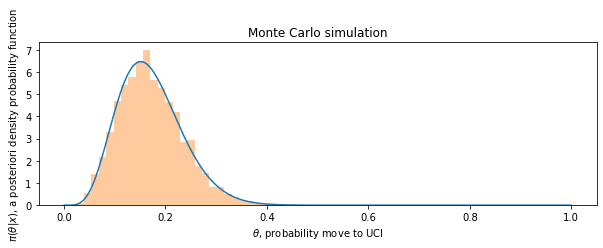

Efficiency 0.024456666666666668
KstestResult(statistic=0.006920846988635931, pvalue=0.8711631674334029)
N = 300000


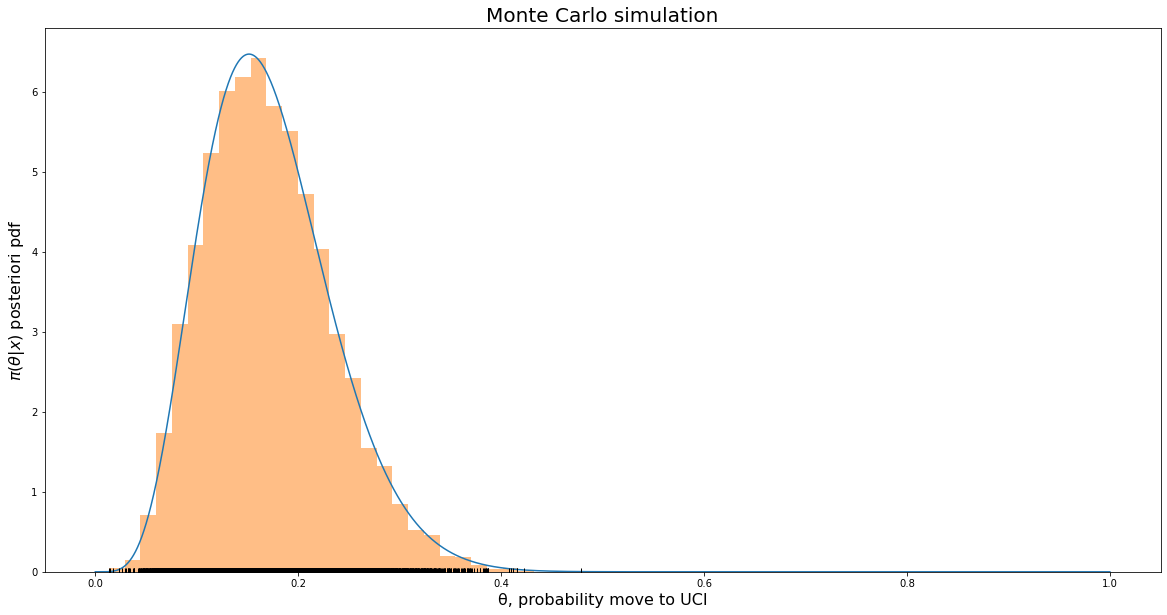

In [12]:
np.random.seed(123)

a, b, k, n = 5, 10, 1, 20
N = 300000

# Comparativa con el resultado analítico
theta_range = np.linspace(0, 1, N)
posterior = beta(a+k, b+(n-k)).pdf(x=theta_range)

# Generación de muestras a partir de la prior
theta_samples = beta.rvs(a,b,size=N)
p = lambda x: x**k*(1-x)**(n-k)*n/k

# Condición de aceptación/rechazo MC
u = uniform.rvs(size = N)
x_ok = theta_samples[u  < p(theta_samples)]

# Resultados K-S
print (f'Efficiency {len(x_ok) / N}')
print (kstest(x_ok, beta.cdf, args=(a+k, b+(n-k))) )
print("N = {0}".format(N))

# Plot de los resultados
plt.figure(figsize=(20,10))
plt.plot(theta_range, posterior)
plt.plot(x_ok, [0.01]*len(x_ok), '|', color='k')
plt.hist(x_ok,density=True, linewidth=1, bins=30,label='Sample',alpha=0.5)
plt.title('Monte Carlo simulation',fontsize=20)
plt.xlabel('θ, probability move to UCI', fontsize=16)
plt.ylabel(r'$\pi(\theta|x)$ posteriori pdf', fontsize=16)
plt.show()

Vemos que al utilizar $N=30000$ se obtiene una eficiencia del $2.44\%$ y el $p$-valor obtenido utilizando un test de Kolmogorov Smirnov es igual a $0.87116316>0.05$, por lo que no tenemos evidencia estadística para rechazar que la muestra no siga la distribución $Beta(a+k, b+(n-k))$.